In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
np.set_printoptions(edgeitems=10)

In [2]:
data = pd.read_csv("data/dataset_1.csv",index_col=0)
data

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561
...,...,...
995,-5.060165,2.482045
996,-5.079404,2.773580
997,-5.861520,3.068426
998,-5.018934,3.110904


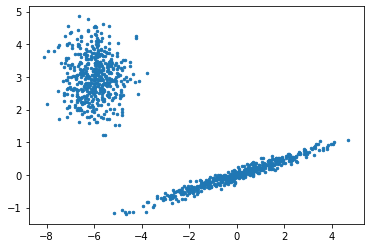

In [3]:
plt.scatter(data["normalized_age"], data["normalized_salary"], s=6)

In [4]:
def plot_with_centroids_and_labels(data_array, centroids, labels):
#     plt.figure(figsize=(10,8))
    plt.scatter(data_array[:,0],data_array[:,1], c=labels, s=6)
    plt.scatter(centroids[:,0],centroids[:,1], color='blue', marker='o', s=300, zorder=2)
#     plt.xlabel('Normalized Age'), plt.ylabel('Normalized Salary'), plt.title('KMeans clustering for data'), 
    plt.show()

In [5]:
def choice_random_centroids(k, data):
    centroids = np.empty((k, data.shape[1]))
    for i in range(k):
        line = [np.random.choice(data[:,col], size=1) for col in range(data.shape[1])]
        centroids[i,:] = line
    return centroids

def determine_C_movement(centroids, old_centroids, decimals):
    a = np.round(centroids, decimals)
    b = np.round(old_centroids, decimals)   
    return np.array_equal(a, b)


def compute_distances(k, metric, data, centroids, distances_array):
    for idx_centroid in range(k):
        if metric == "l2":
            # calcualte Euclidean d
            substraction = data - centroids[idx_centroid,:]
            dist = np.sqrt(np.sum((substraction)**2, axis=1))
            distances_array[:,idx_centroid] = dist            
        else :
            # calculate Manhatan d
            print("Métrique manhattan non prise en charge. Veuillez choisir : metric = 'l2'")                          
    return distances_array
    

def compute_new_centroids(k, data, labels, centroids):        
    for idx_centroid in range(k):
        kth_subset = data[labels == idx_centroid]
        centroids[idx_centroid,:] = [np.mean(kth_subset[:,col]) for col in range(data.shape[1])]
    return centroids


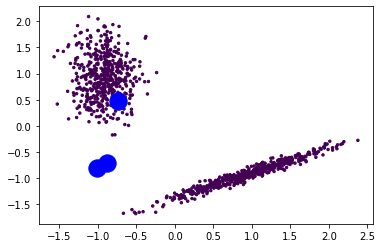

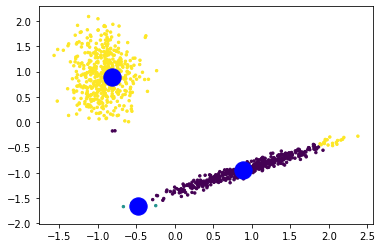

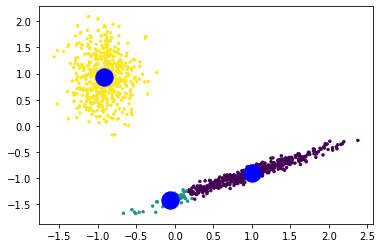

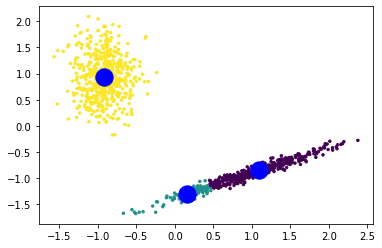

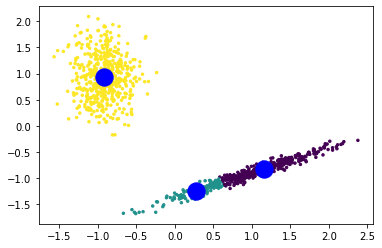

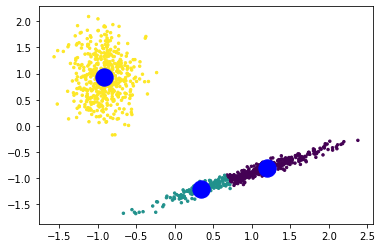

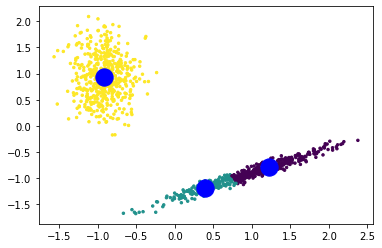

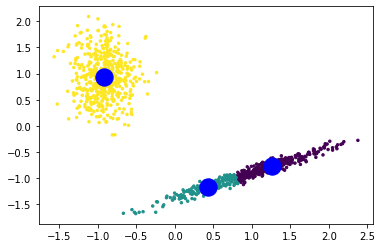

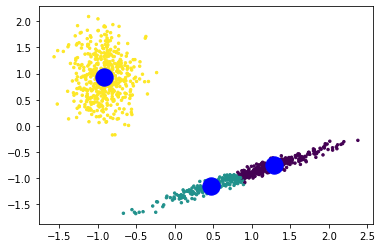

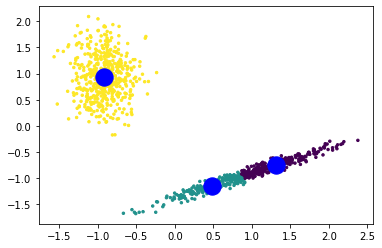

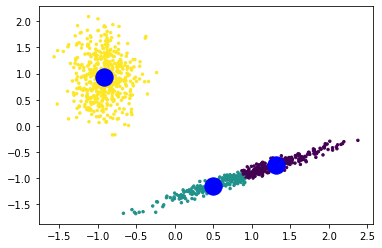

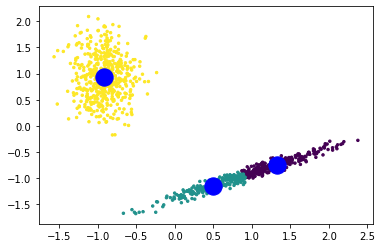

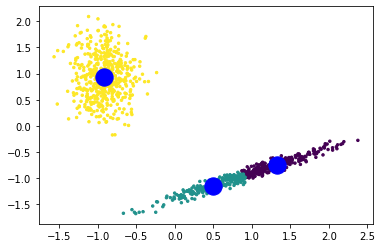

12

In [6]:
# KMEANS :

def KMeans_scratch(data, k, decimals, metric="l2", scaler="StandardScaler", plots=False):  
    
    # STANDARD SCALER
    if scaler == "StandardScaler" :
        from sklearn.preprocessing import StandardScaler
        data = StandardScaler().fit_transform(data)
    else:
        data = data.values

    # VALEURS INITIALES
    centroids = choice_random_centroids(k, data) # calls choice_random_centroids function
    distances_array = np.zeros((data.shape[0], k)) # distances initiales = 0
    C_static = False  # mouvement initial des centroïdes 
    labels = np.zeros(data.shape[0],)
    
    if plots : plot_with_centroids_and_labels(data, centroids, labels)
        
    count = 0 
    while C_static == False :

        # Stocker les positions des centroïdes avant de les recalculer
        import copy
        old_centroids = copy.deepcopy(centroids)

#         old_centroids = centroids

        # Calcul des distances : OK     
        distances_array = compute_distances(k, metric, data, centroids, distances_array) 

        # Labeliser les points : OK
        labels = np.argmin(distances_array, axis=1)

        # calculer les positions des barycentres = nouveaux centroïdes : OK
        centroids = compute_new_centroids(k, data, labels, centroids)

        # update C_movement variable : OK
        C_static = determine_C_movement(centroids, old_centroids, decimals)

        if plots : plot_with_centroids_and_labels(data, centroids, labels)
            
        count += 1

#     return centroids, labels, count
    return count
    
KMeans_scratch(data, 3, 3, plots=True)